In [3]:
import sys 
sys.path.append('../lznestpy')

import nestpy
from random import choices
from nestUtils import *

import matplotlib.pyplot as plt
import numpy as np

from LXeSimulation import *
from LArSimulation import *

import numpy as np

import LArDS50 as LAr

nEvents = 10000

In [12]:
# Flat spectrum

def sampleEnergy(energy, eventRate, nEvents=nEvents):

    total_rate = np.sum(eventRate)
    bin_edges = np.zeros(len(energy)+1)
    bin_edges[1:-1] = (energy[1:] + energy[:-1])/2
    bin_edges[0] = energy[0] - (energy[1]-energy[0])/2
    bin_edges[-1] = energy[-1] + (energy[-1]-energy[-2])/2

    print(np.sum(eventRate/total_rate))
    bin_indices = np.random.choice(len(energy), size=nEvents, p=eventRate/total_rate)
    sampled_energies = np.zeros(nEvents)
    for i in range(nEvents):
        bin_idx = bin_indices[i]
        sampled_energies[i] = np.random.uniform(bin_edges[bin_idx], bin_edges[bin_idx+1])

    return sampled_energies



1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999998


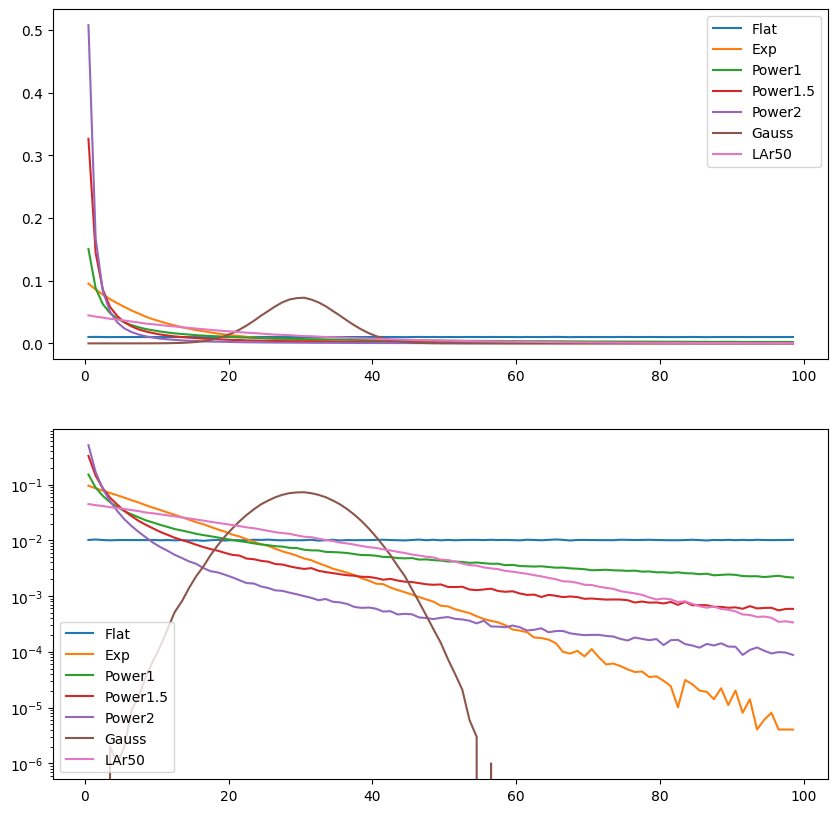

In [52]:
flatEnergy = np.linspace(0, 100, 501,endpoint=True)
flatEventRate = np.ones(501)

flatEnergiesSampled = sampleEnergy(flatEnergy, flatEventRate,1000000)
flatHistEnergy, edges = np.histogram(flatEnergiesSampled, bins=np.arange(0, 100))

expEnergy = np.linspace(0, 100, 501,endpoint=True)
expEventRate = np.exp(-expEnergy/10)

expEnergiesSampled = sampleEnergy(expEnergy, expEventRate,1000000)
expHistEnergy, edges = np.histogram(expEnergiesSampled, bins=np.arange(0, 100))

powerEnergy = np.linspace(0, 100, 501,endpoint=True)
powerEventRate = (powerEnergy+1)**(-1)

powerEnergiesSampled = sampleEnergy(powerEnergy, powerEventRate,1000000)
powerHistEnergy, edges = np.histogram(powerEnergiesSampled, bins=np.arange(0, 100))

powerEnergy1p5 = np.linspace(0, 100, 501, endpoint=True)
f = (powerEnergy1p5+1)**(-1.5)

powerEnergiesSampled1p5 = sampleEnergy(powerEnergy1p5, powerEventRate1p5,1000000)
powerHist1p5Energy, edges = np.histogram(powerEnergiesSampled1p5, bins=np.arange(0, 100))

powerEnergy2 = np.linspace(0, 100, 501, endpoint=True)
powerEventRate2 = (powerEnergy2+1)**(-2)

powerEnergiesSampled2 = sampleEnergy(powerEnergy2, powerEventRate2,1000000)
powerHist2Energy, edges = np.histogram(powerEnergiesSampled2, bins=np.arange(0, 100))

gaussEnergy = np.linspace(0, 100, 501, endpoint=True)
mu = 30
sigma = np.sqrt(30)
gaussEventRate = np.exp(-(gaussEnergy - mu)**2/(2*sigma**2))

gaussEnergiesSampled = sampleEnergy(gaussEnergy, gaussEventRate, 1000000)
gaussHistEnergy, edges = np.histogram(gaussEnergiesSampled, bins=np.arange(0, 100))



LAr50plFile = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Argon/Ar50plTable.csv"
LAr50Energy, LAr50EventRate = np.loadtxt(LAr50plFile, delimiter=',', unpack=True)

LAr50EnergiesSampled = sampleEnergy(LAr50Energy, LAr50EventRate,1000000)
LAr50HistEnergy, edges = np.histogram(LAr50EnergiesSampled, bins=np.arange(0, 100))



binCentersEnergy = (edges[:-1] + edges[1:])/2

fig, axes = plt.subplots(2,1,figsize=(10,10))
axes[0].plot(binCentersEnergy, flatHistEnergy/np.sum(flatHistEnergy), label='Flat')
axes[0].plot(binCentersEnergy, expHistEnergy/np.sum(expHistEnergy), label='Exp')
axes[0].plot(binCentersEnergy, powerHistEnergy/np.sum(powerHistEnergy), label='Power1')
axes[0].plot(binCentersEnergy, powerHist1p5Energy/np.sum(powerHist1p5Energy), label='Power1.5')
axes[0].plot(binCentersEnergy, powerHist2Energy/np.sum(powerHist2Energy), label='Power2')
axes[0].plot(binCentersEnergy, gaussHistEnergy/np.sum(gaussHistEnergy), label='Gauss')
axes[0].plot(binCentersEnergy, LAr50HistEnergy/np.sum(LAr50HistEnergy), label='LAr50')
axes[0].legend()

axes[1].plot(binCentersEnergy, flatHistEnergy/np.sum(flatHistEnergy), label='Flat')
axes[1].plot(binCentersEnergy, expHistEnergy/np.sum(expHistEnergy), label='Exp')
axes[1].plot(binCentersEnergy, powerHistEnergy/np.sum(powerHistEnergy), label='Power1')
axes[1].plot(binCentersEnergy, powerHist1p5Energy/np.sum(powerHist1p5Energy), label='Power1.5')
axes[1].plot(binCentersEnergy, powerHist2Energy/np.sum(powerHist2Energy), label='Power2')
axes[1].plot(binCentersEnergy, gaussHistEnergy/np.sum(gaussHistEnergy), label='Gauss')
axes[1].plot(binCentersEnergy, LAr50HistEnergy/np.sum(LAr50HistEnergy), label='LAr50')
axes[1].legend()

axes[1].set_yscale('log')
plt.show()

## Primary electron yields

/Users/yxu/workbenches/XeArLoopworkbench/LArDS50.py:62: RuntimeWarning: invalid value encountered in sqrt
  return 0.145*np.sqrt(epsilon)
/Users/yxu/workbenches/XeArLoopworkbench/LArDS50.py:65: RuntimeWarning: invalid value encountered in scalar power
  return np.log(1 + 1.1383 * fZ * epsilon) / (2*(fZ*epsilon + 0.01321*(fZ*epsilon)**0.21226 + 0.19593*(fZ*epsilon)**0.5))


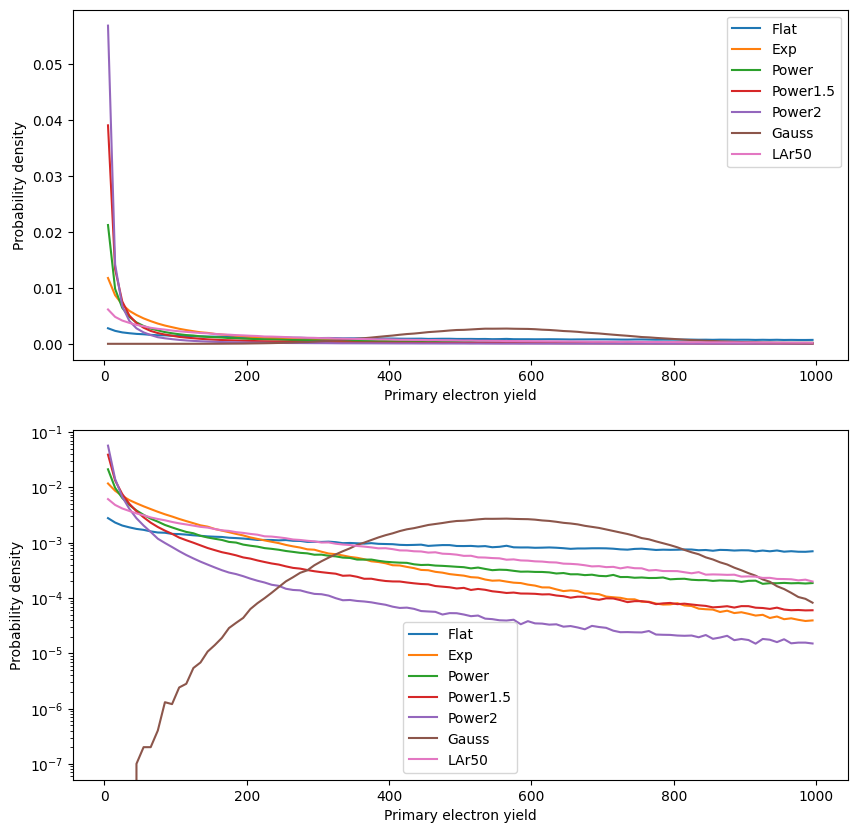

In [50]:
# Calculate primary electron yields for each spectrum
flatPrimaryYields = [LAr.primaryIonNumberNR(E) for E in flatEnergiesSampled]
expPrimaryYields = [LAr.primaryIonNumberNR(E) for E in expEnergiesSampled] 
powerPrimaryYields = [LAr.primaryIonNumberNR(E) for E in powerEnergiesSampled]
powerPrimaryYields1p5 = [LAr.primaryIonNumberNR(E) for E in powerEnergiesSampled1p5]
powerPrimaryYields2 = [LAr.primaryIonNumberNR(E) for E in powerEnergiesSampled2]
gaussPrimaryYields = [LAr.primaryIonNumberNR(E) for E in gaussEnergiesSampled]
LAr50PrimaryYields = [LAr.primaryIonNumberNR(E) for E in LAr50EnergiesSampled]

# Plot histograms of primary yields
bins = np.linspace(0, 1000, 101)
binCentersYields = (bins[:-1] + bins[1:])/2

flatHistYields, _ = np.histogram(flatPrimaryYields, bins=bins, density=True)
expHistYields, _ = np.histogram(expPrimaryYields, bins=bins, density=True)
powerHistYields, _ = np.histogram(powerPrimaryYields, bins=bins, density=True)
power1p5HistYields, _ = np.histogram(powerPrimaryYields1p5, bins=bins, density=True)
power2HistYields, _ = np.histogram(powerPrimaryYields2, bins=bins, density=True)
gaussHistYields, _ = np.histogram(gaussPrimaryYields, bins=bins, density=True)
lar50HistYields, _ = np.histogram(LAr50PrimaryYields, bins=bins, density=True)

fig, axes = plt.subplots(2,1,figsize=(10,10))
axes[0].plot(binCentersYields, flatHistYields, label='Flat')
axes[0].plot(binCentersYields, expHistYields, label='Exp') 
axes[0].plot(binCentersYields, powerHistYields, label='Power')
axes[0].plot(binCentersYields, power1p5HistYields, label='Power1.5')
axes[0].plot(binCentersYields, power2HistYields, label='Power2')
axes[0].plot(binCentersYields, gaussHistYields, label='Gauss')
axes[0].plot(binCentersYields, lar50HistYields, label='LAr50')
axes[0].set_xlabel('Primary electron yield')
axes[0].set_ylabel('Probability density')
axes[0].legend()

axes[1].set_yscale('log')
axes[1].plot(binCentersYields, flatHistYields, label='Flat')
axes[1].plot(binCentersYields, expHistYields, label='Exp') 
axes[1].plot(binCentersYields, powerHistYields, label='Power')
axes[1].plot(binCentersYields, power1p5HistYields, label='Power1.5')
axes[1].plot(binCentersYields, power2HistYields, label='Power2')
axes[1].plot(binCentersYields, gaussHistYields, label='Gauss')
axes[1].plot(binCentersYields, lar50HistYields, label='LAr50')
axes[1].set_xlabel('Primary electron yield')
axes[1].set_ylabel('Probability density')
axes[1].legend()
plt.show()

/Users/yxu/workbenches/XeArLoopworkbench/LArDS50.py:62: RuntimeWarning: invalid value encountered in sqrt
  return 0.145*np.sqrt(epsilon)
/Users/yxu/workbenches/XeArLoopworkbench/LArDS50.py:65: RuntimeWarning: invalid value encountered in scalar power
  return np.log(1 + 1.1383 * fZ * epsilon) / (2*(fZ*epsilon + 0.01321*(fZ*epsilon)**0.21226 + 0.19593*(fZ*epsilon)**0.5))


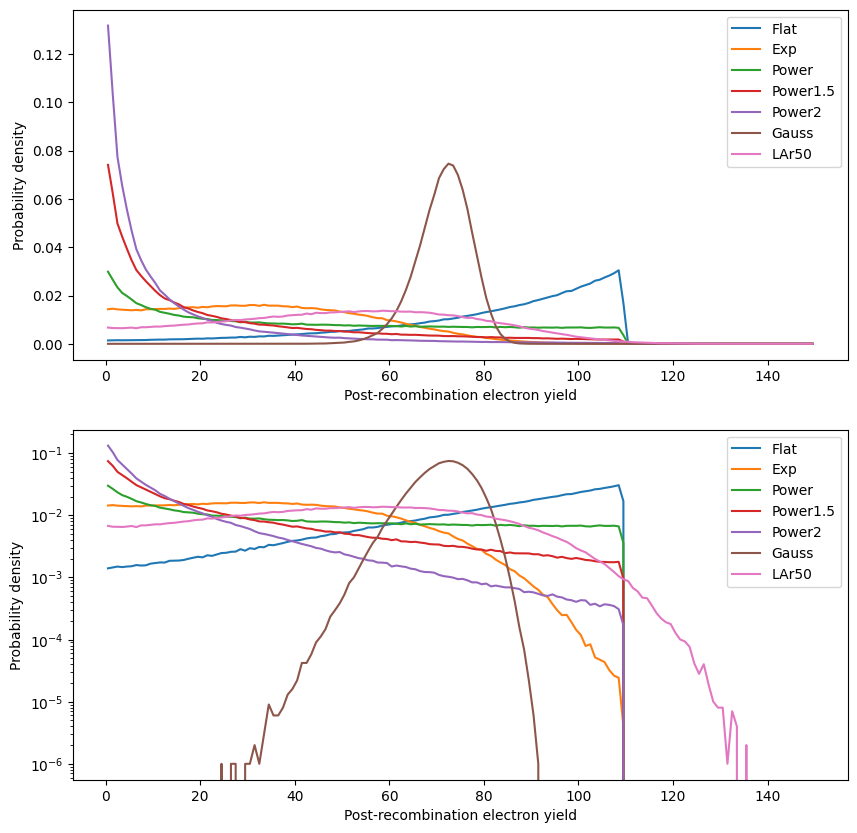

In [51]:
# Post recombination primary electron yields

# Calculate post-recombination primary electron yields for each spectrum
flatElectrons = [LAr.postRecombinationPrimaryIonNumberNR(E) for E in flatEnergiesSampled]
expElectrons = [LAr.postRecombinationPrimaryIonNumberNR(E) for E in expEnergiesSampled]
powerElectrons = [LAr.postRecombinationPrimaryIonNumberNR(E) for E in powerEnergiesSampled]
power1p5Electrons = [LAr.postRecombinationPrimaryIonNumberNR(E) for E in powerEnergiesSampled1p5]
power2Electrons = [LAr.postRecombinationPrimaryIonNumberNR(E) for E in powerEnergiesSampled2]
gaussElectrons = [LAr.postRecombinationPrimaryIonNumberNR(E) for E in gaussEnergiesSampled]
LAr50Electrons = [LAr.postRecombinationPrimaryIonNumberNR(E) for E in LAr50EnergiesSampled]

# Plot histograms of post-recombination yields
bins = np.linspace(0, 150, 151)
binCentersElectrons = (bins[:-1] + bins[1:])/2

flatElectrons, _ = np.histogram(flatElectrons, bins=bins, density=True)
expElectrons, _ = np.histogram(expElectrons, bins=bins, density=True)
powerElectrons, _ = np.histogram(powerElectrons, bins=bins, density=True)
power1p5Electrons, _ = np.histogram(power1p5Electrons, bins=bins, density=True)
power2Electrons, _ = np.histogram(power2Electrons, bins=bins, density=True)
gaussElectrons, _ = np.histogram(gaussElectrons, bins=bins, density=True)
lar50Electrons, _ = np.histogram(LAr50Electrons, bins=bins, density=True)

fig, axes = plt.subplots(2,1,figsize=(10,10))
axes[0].plot(binCentersElectrons, flatElectrons, label='Flat')
axes[0].plot(binCentersElectrons, expElectrons, label='Exp')
axes[0].plot(binCentersElectrons, powerElectrons, label='Power')
axes[0].plot(binCentersElectrons, power1p5Electrons, label='Power1.5')
axes[0].plot(binCentersElectrons, power2Electrons, label='Power2')
axes[0].plot(binCentersElectrons, gaussElectrons, label='Gauss')
axes[0].plot(binCentersElectrons, lar50Electrons, label='LAr50')
axes[0].set_xlabel('Post-recombination electron yield')
axes[0].set_ylabel('Probability density')
axes[0].legend()

axes[1].set_yscale('log')
axes[1].plot(binCentersElectrons, flatElectrons, label='Flat')
axes[1].plot(binCentersElectrons, expElectrons, label='Exp')
axes[1].plot(binCentersElectrons, powerElectrons, label='Power')
axes[1].plot(binCentersElectrons, power1p5Electrons, label='Power1.5')
axes[1].plot(binCentersElectrons, power2Electrons, label='Power2')
axes[1].plot(binCentersElectrons, gaussElectrons, label='Gauss')
axes[1].plot(binCentersElectrons, lar50Electrons, label='LAr50')
axes[1].set_xlabel('Post-recombination electron yield')
axes[1].set_ylabel('Probability density')
axes[1].legend()
plt.show()

## Combine plots

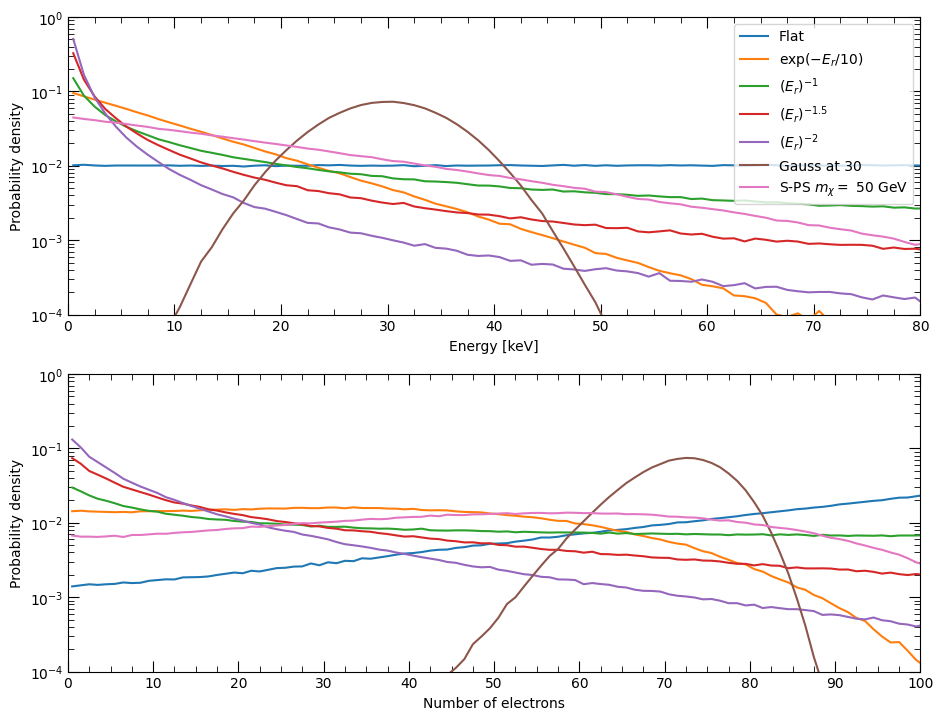

In [67]:
fig, axes = plt.subplots(2,1,figsize=(11, 8.5))

# Plot energy spectra
axes[0].plot(binCentersEnergy, flatHistEnergy/np.sum(flatHistEnergy), label=r'Flat')
axes[0].plot(binCentersEnergy, expHistEnergy/np.sum(expHistEnergy), label=r'$\exp(-E_r/10)$') 
axes[0].plot(binCentersEnergy, powerHistEnergy/np.sum(powerHistEnergy), label=r'$(E_r)^{-1}$')
axes[0].plot(binCentersEnergy, powerHist1p5Energy/np.sum(powerHist1p5Energy), label=r'$(E_r)^{-1.5}$')
axes[0].plot(binCentersEnergy, powerHist2Energy/np.sum(powerHist2Energy), label=r'$(E_r)^{-2}$')
axes[0].plot(binCentersEnergy, gaussHistEnergy/np.sum(gaussHistEnergy), label='Gauss at 30')
axes[0].plot(binCentersEnergy, LAr50HistEnergy/np.sum(LAr50HistEnergy), label='S-PS $m_\chi=$ 50 GeV')
axes[0].set_xlabel('Energy [keV]')
axes[0].set_ylabel('Probability density')
axes[0].set_yscale('log')
axes[0].set_xlim(0, 80)
axes[0].set_ylim(1E-4, 1)

axes[0].xaxis.set_major_locator(plt.MultipleLocator(10))
axes[0].xaxis.set_minor_locator(plt.MultipleLocator(2.5))

axes[0].tick_params(axis='y', direction='in', length=8, right=True, )
axes[0].tick_params(axis='y', which='minor', direction='in', length=4, right=True)
axes[0].tick_params(axis='x', direction='in', length=8, top=True)
axes[0].tick_params(axis='x', which='minor', direction='in', length=4, top=True)


axes[0].legend()

# Plot post-recombination yields
axes[1].plot(binCentersElectrons, flatElectrons, label='1')
axes[1].plot(binCentersElectrons, expElectrons,label=r'$\exp(-E_r/10)$')
axes[1].plot(binCentersElectrons, powerElectrons, label=r'$(E_r)^{-1}$')
axes[1].plot(binCentersElectrons, power1p5Electrons, label=r'$(E_r)^{-1.5}$')
axes[1].plot(binCentersElectrons, power2Electrons, label=r'$(E_r)^{-2}$')
axes[1].plot(binCentersElectrons, gaussElectrons, label='Gauss at 30')
axes[1].plot(binCentersElectrons, lar50Electrons, label='S-PS $m_\chi=$ 50 GeV')
axes[1].set_xlabel('Number of electrons')
axes[1].set_ylabel('Probability density')
axes[1].set_yscale('log')
axes[1].set_xlim(0, 100)
axes[1].set_ylim(1E-4, 1)

axes[1].xaxis.set_major_locator(plt.MultipleLocator(10))
axes[1].xaxis.set_minor_locator(plt.MultipleLocator(2.5))

axes[1].tick_params(axis='y', direction='in', length=8, right=True, )
axes[1].tick_params(axis='y', which='minor', direction='in', length=4, right=True)
axes[1].tick_params(axis='x', direction='in', length=8, top=True)
axes[1].tick_params(axis='x', which='minor', direction='in', length=4, top=True)

# axes[1].legend()
plt.show()
